<a href="https://colab.research.google.com/github/ciaraadkins/2022-mit-adsp-portfolio/blob/main/02_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and tSNE**

-----------------------------

**Author**: Ciara Adkins

**Email**: adkins.ciara@gmail.com

**LinkedIn**: https://www.linkedin.com/in/ciara-adkins/

-----------------------------

In this project we will be using the auto-mpg dataset using PCA and tSNE.

Completed as a part of the MIT Applied Data Science course in the Spring of 2022. Full e-portfolio can be viewed here: https://eportfolio.mygreatlearning.com/ciara-adkins

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [3]:
data = pd.read_csv("auto-mpg.csv")

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [6]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [7]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [8]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [9]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [10]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

## **Check the summary statistics of the data**

In [11]:
#Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**
- Displacement has a high range of values from 68 to 455 cu. inches
- Cylinders, displacement,  horsepower, and weight all seem to be right skewed since their means are greater than their respective medians
- It's interesting that for cylinders 4 is not only the median but also Q2. This potentially means that there are a lot of cars with 4 cylinders in the dataset

#### Let's check the distribution and outliers for each column in the data

## **Create the histogram to check distribution & create boxplot to visualize outliers of all variables**

mpg
Skew : 0.46


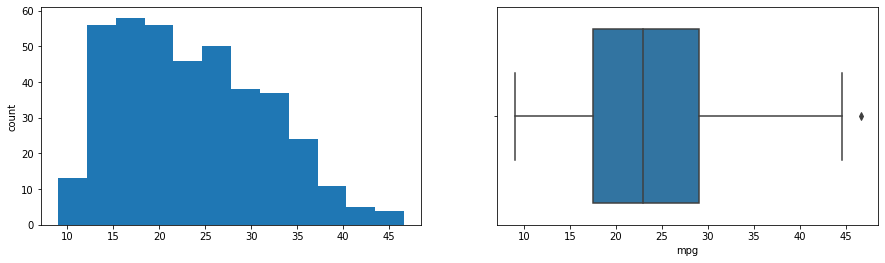

cylinders
Skew : 0.53


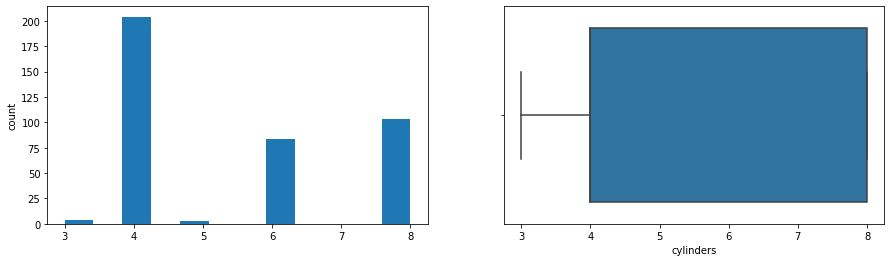

displacement
Skew : 0.72


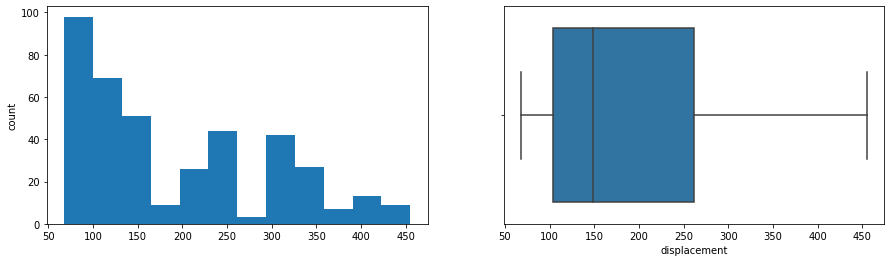

horsepower
Skew : 1.11


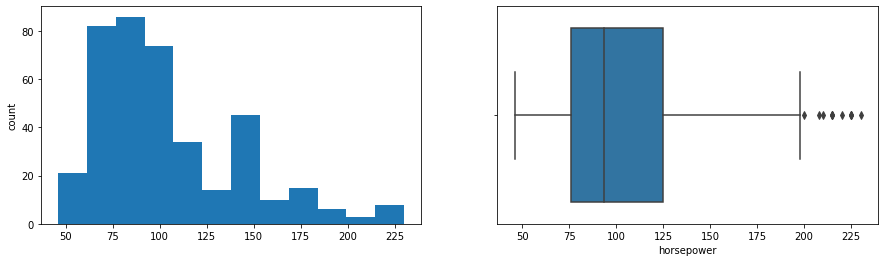

weight
Skew : 0.53


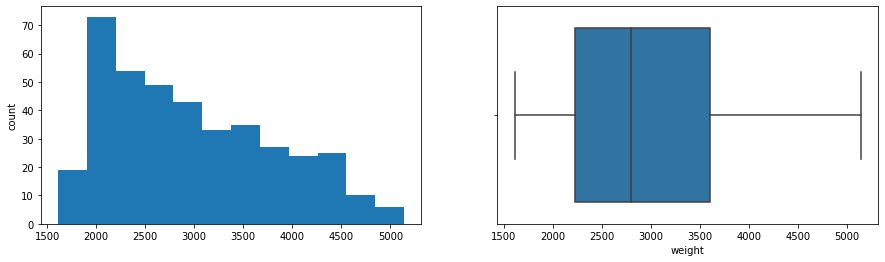

acceleration
Skew : 0.28


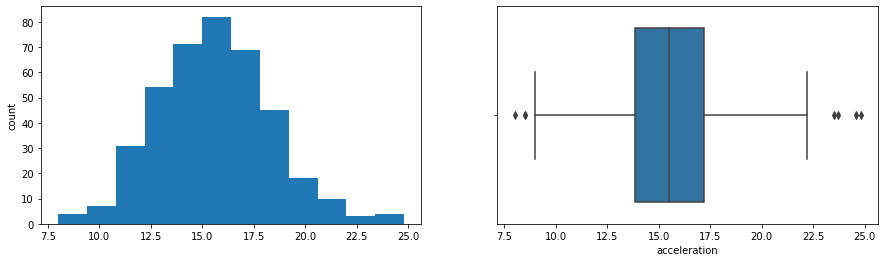

model year
Skew : 0.01


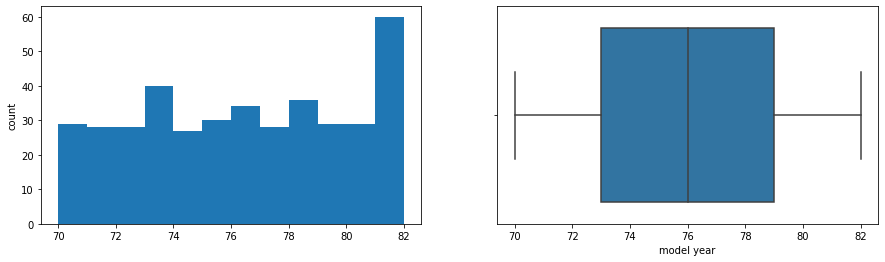

In [12]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=12,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
- When looking at MPG there's only one outlier
- As expected, there are a lot of car models with 4 cylinders. 4 is the mode. Cars seem to only really have either 4, 6, or 8 cylinders
- Acceleration has quite a few outliers but is one of the few variables without much skew
- MPG, displacement, horsepower, and weight are all right skewed
- Model year has nearly no skew, no outliers, and is seemingly uniform across the years except for the final peak


#### Checking correlation

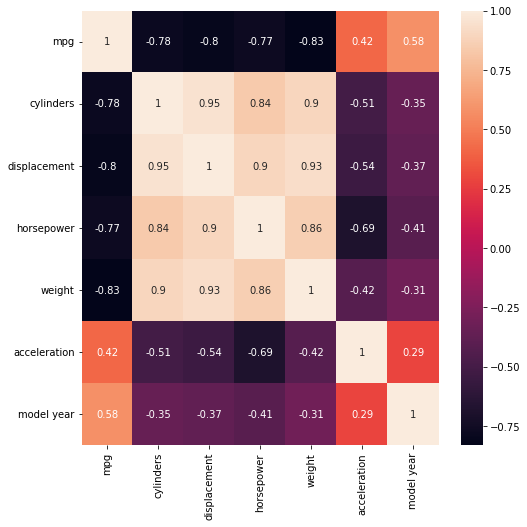

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [14]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [15]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

## **Apply the PCA algorithm**

In [16]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

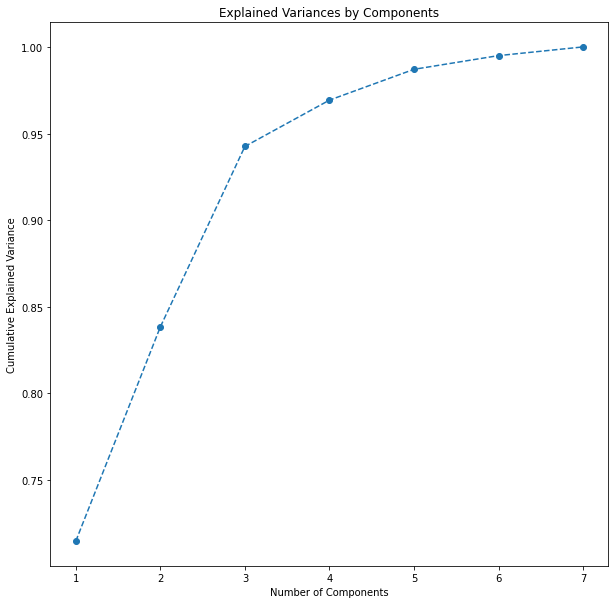

In [17]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [18]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**
- Out of the 8 original features, we've reduced our dimensionality to 3, and with these 3 variables we can explain approximately 90% of the original variance
- We reduced our dimensionality by about 63% with only a 10% loss in variance

In [19]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


## **Interpret the coefficients of three principal components**

In [20]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


** *italicized text*Observations:**
- Each of the principal components is a linear combination of our starting variables
- PC1 is associated with low mpg values but high values for cylinders, displacement, horsepower, and weight
- PC1 could be represented as -0.40 * mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 * acceleration -0.23 * modelyear
- PC1 seems to capture larger vehicles or high performance cars like sports cars since they seem to be the heavier models with a higher number of cylinders, larger engine, and poor gas mileage. Not to mention PC1 is related to low acceleration numbers which means a fast 0 to 60 acceleration
- PC2 is mostly associated with a low model year, so these would be the older cars
- PC3 is mostly associated with high values in acceleration which means it takes the cars longer to accelerate from 0 to 60. PC3 also is related to low horsepower which points to PC3 being associated with day-to-day vehicles that aren't especially fast

#### We can also visualize the data in 2 dimensions using first two principal components 

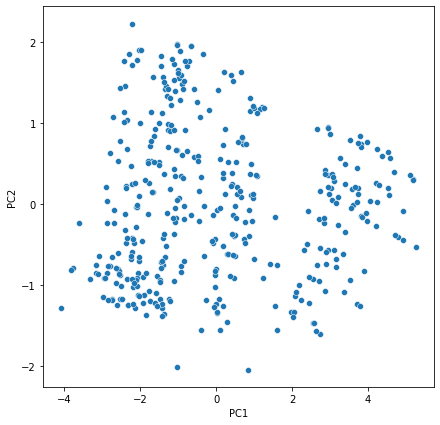

In [21]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

## **Create a scatter plot for first two principal components** 

Text(0, 0.5, 'PC2')

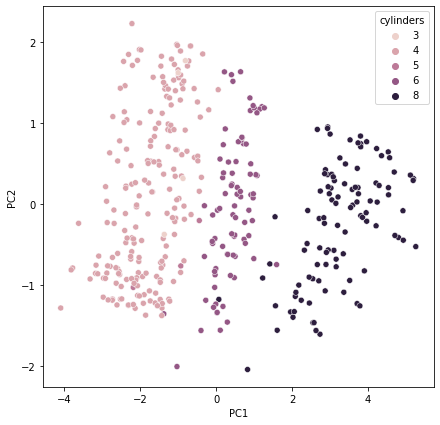

In [22]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x=data_pca1[0],y=data_pca1[1],data=df_concat, hue='cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**
- By adding the color to represent the range of cylinder values, we can see how PC1 accounts for the variation in the number of cylinders in the cars
- PC1 is able to account for a good amount of the variation seen in the cylinder values and teh coloring makes for intuitive grouping of the data

## t-SNE

## **Apply the TSNE embedding**

In [23]:
tsne = TSNE(n_components = 2, random_state=1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
data_tsne.shape

(398, 2)

In [25]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [26]:
data_tsne.head()

,Component 1,Component 2
0,-23.104227,-30.228313
1,-24.950542,-29.500071
2,-24.119961,-30.136980
3,-23.673611,-29.754570
4,-23.841228,-30.443615


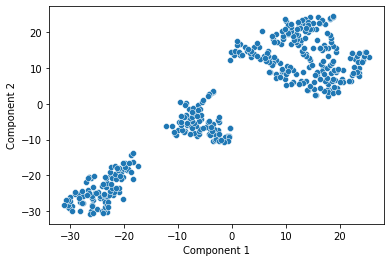

In [27]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

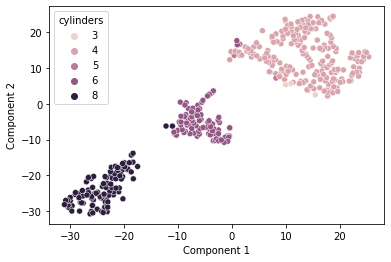

In [28]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**
- This t-SNE scatter plot indicates that there are about 3 separate clusters in this dataset
- Based on the coloring in the data, it is pretty clear that one way for us to cluster the data would be based off of the number of cylinders

In [29]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [30]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

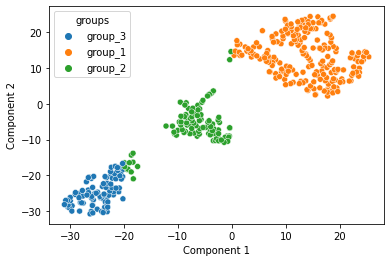

In [31]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [32]:
data['groups'] = data_tsne['groups'] 

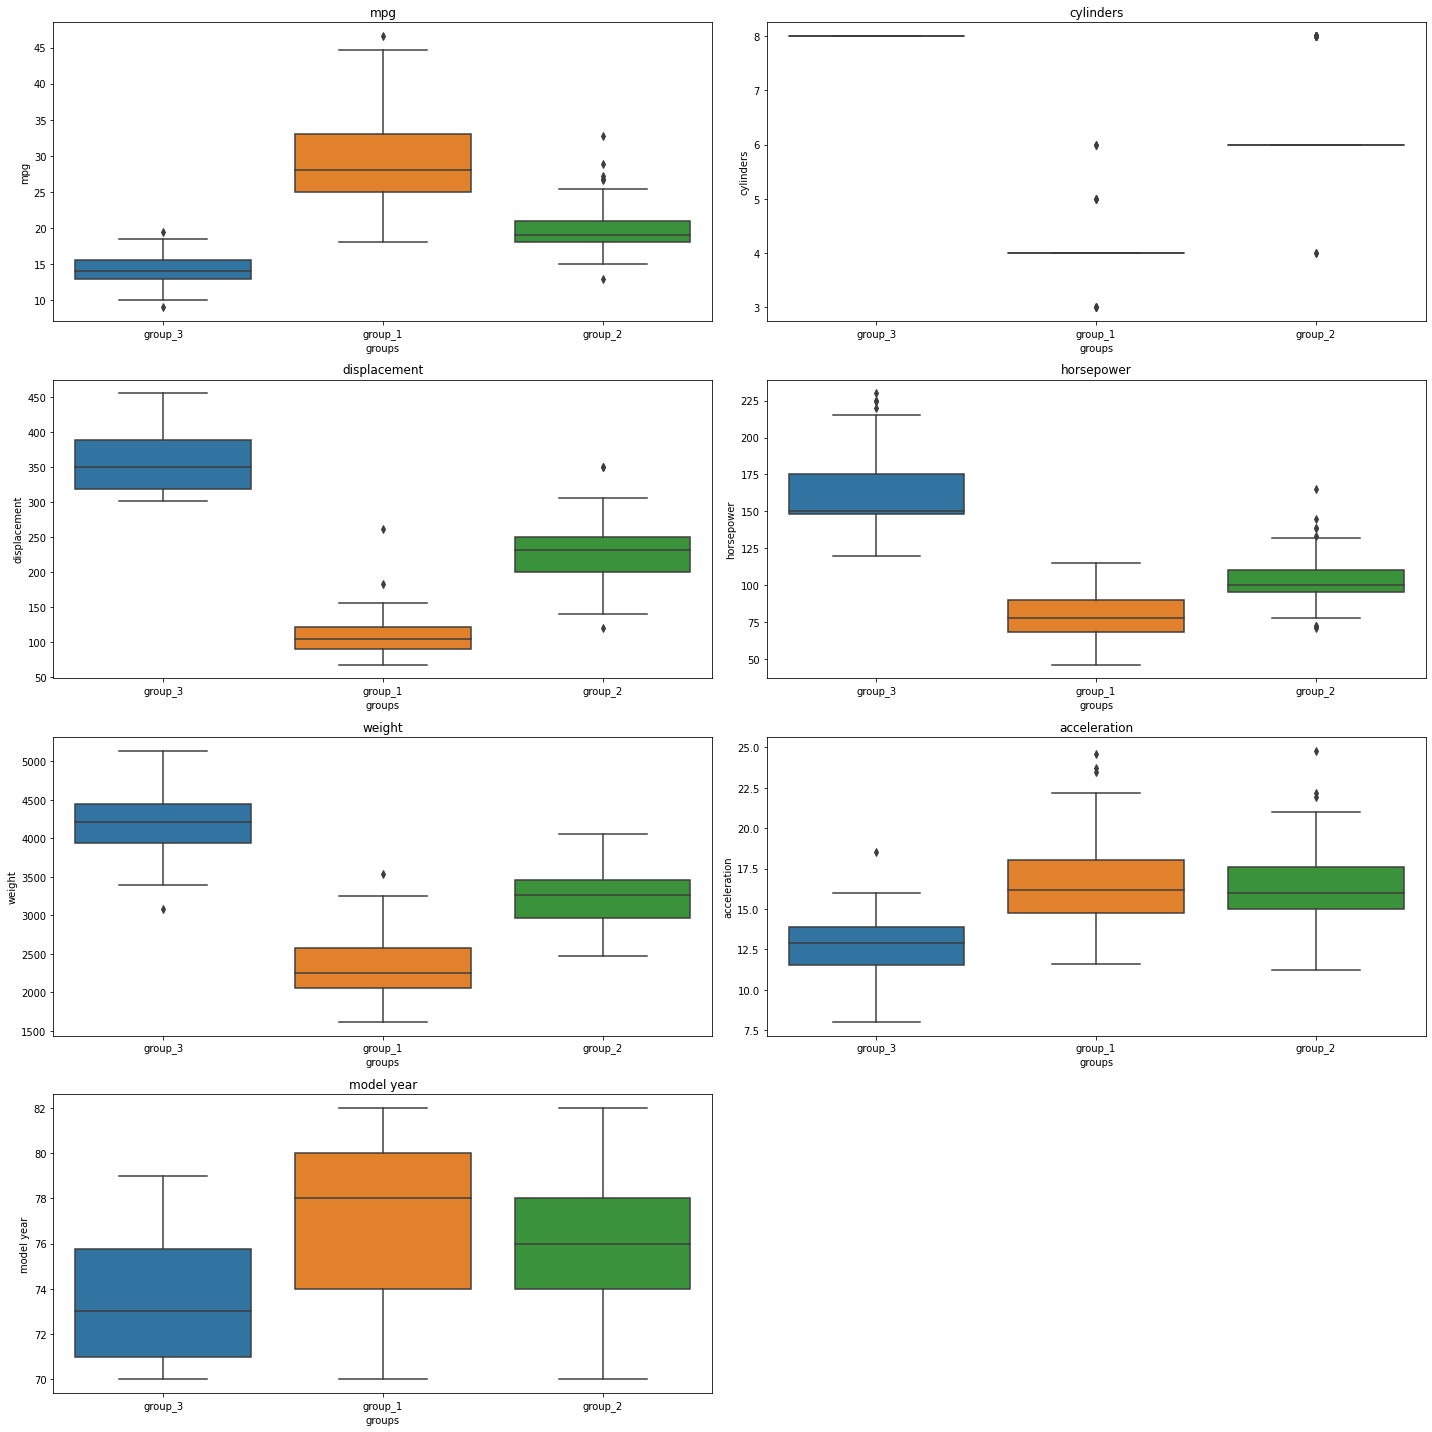

In [33]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(y=data[variable],x=data['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

## **Final Observations:**
- Each of the groups has pretty distinct characteristics

Group 1: Group 1 represents smaller cars (low weight) that are not that fast (low accel) but they are highly efficient (high mpg). I would think of these as good day-to-day smaller cars like a sedan. I'd expect for these to be the cheapest models ($)
- High MPG
- 4 cylinders (lowest)
- Small engine
- Low horsepower
- Light
- Mid to poor acceleration
- More recent models

Group 3: Group 3 represents fast but very fuel inefficient models. Most likely sports cars given that all of the models have 8 cylinders, a high horsepower, and a quick acceleration. I'd expect for these to be the most expensive models ($$$)
- Low MPG
- 8 cylinders
- Large engine
- High horsepower
- Heavy
- Quick acceleration

Group 2: Group 2 represents cars that fall somewhere between Group 1 and 3. They are mid-sized with decent fuel efficiency like Group 1 but also are higher performing in terms of acceleration and horsepower. I'd expect for these to be mid-range in terms of price ($$)
- Mid MPG
- Mid cylinders (6)
- Mid engine size
- Mid to low horsepower
- Mid acceleration